# Выявление закономерностей определяющих успешность игры

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB* (*Entertainment Software Rating Board*) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

Путь к файлу: */datasets/games.csv*

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Оглавление

1. [Открытие файла с данными и изучение общей информации](#step_1)
2. [Подготовка данных](#step_2)
    - Замена названия столбцов
    - Обработка пропусков и замена типа данных
    - Добавление новых столбцов
3. [Исследовательский анализ](#step_3)
4. [Портрет пользователя каждого региона](#step_4)
5. [Проверка гипотез](#step_5)
6. [Общий вывод](#step_6)

## 1. Открытие файла с данными и изучение общей информации
<a id="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy import stats as st

In [2]:
warnings.filterwarnings("ignore")

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.duplicated().sum()

0

In [7]:
len(games['Name'].unique())

11560

In [8]:
games['Name'].value_counts()

Need for Speed: Most Wanted                      12
Madden NFL 07                                     9
FIFA 14                                           9
LEGO Marvel Super Heroes                          9
Ratatouille                                       9
                                                 ..
The Guided Fate Paradox                           1
Jampack Volume 14 (RP-T)                          1
Mario Strikers Charged                            1
Naruto Shippuden: Gekito Ninja Taisen! EX 3       1
Clannad: Mitsumi Mamoru Sakamichi de - Joukan     1
Name: Name, Length: 11559, dtype: int64

In [9]:
games.query('Name == "Need for Speed: Most Wanted"').sort_values(by=['Platform', 'Year_of_Release'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [10]:
len(games['Platform'].unique())

31

In [11]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [12]:
len(games['Year_of_Release'].value_counts())

37

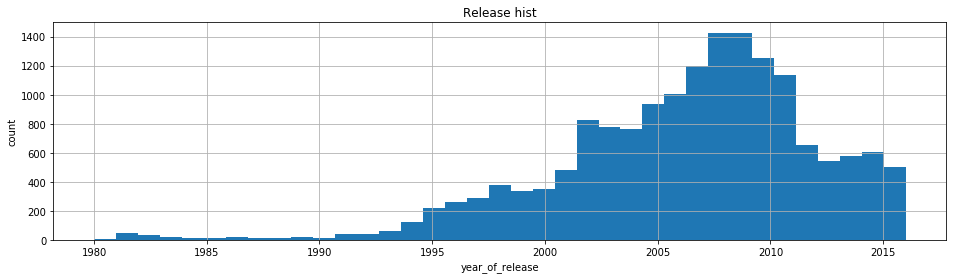

In [13]:
ax = games['Year_of_Release'].plot(kind='hist', bins=37, figsize=(16, 4), grid=True, title='Release hist')
ax.set(xlabel="year_of_release", ylabel="count")
plt.show()

In [14]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [15]:
len(games['Genre'].value_counts())

12

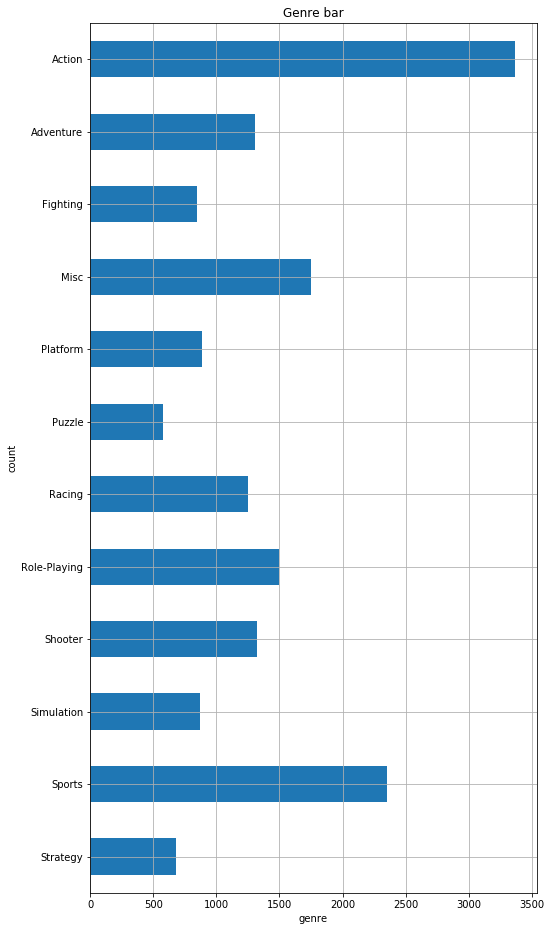

In [16]:
ax = games['Genre'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(8, 16), grid=True, title='Genre bar')
ax.set(xlabel="genre", ylabel="count")
plt.show()

In [17]:
games['NA_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

In [18]:
games['EU_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

In [19]:
games['JP_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

In [20]:
games['Other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

In [21]:
games['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

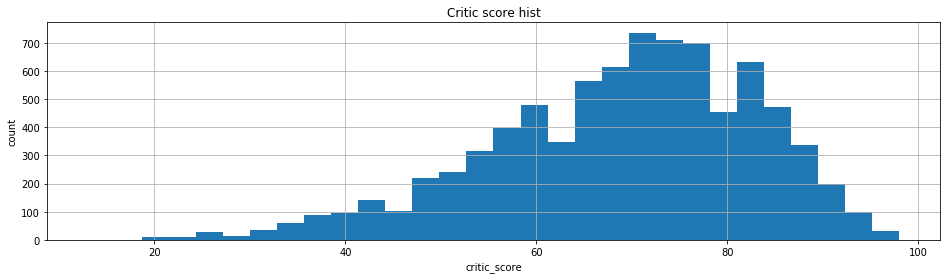

In [22]:
ax = games['Critic_Score'].plot(kind='hist', bins=30, figsize=(16, 4), grid=True, title='Critic score hist')
ax.set(xlabel="critic_score", ylabel="count")
plt.show()

In [23]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
games.query('User_Score != "tbd"')['User_Score'].astype('float64').describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

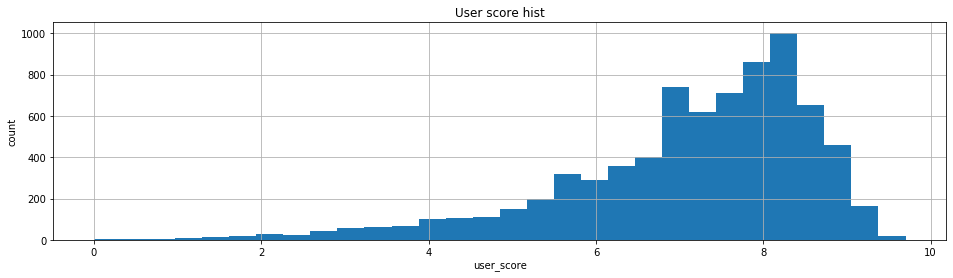

In [25]:
ax = games.query('User_Score != "tbd"')['User_Score'].astype('float64').plot(kind='hist', bins=30, figsize=(16, 4), grid=True, title='User score hist')
ax.set(xlabel="user_score", ylabel="count")
plt.show()

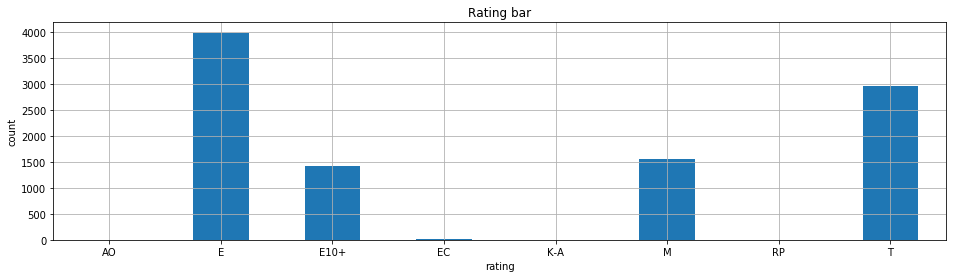

In [26]:
ax = games['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(16, 4), grid=True, title='Rating bar', rot=0)
ax.set(xlabel="rating", ylabel="count")
plt.show()

**Вывод:**

Файл с данными содержит 16715 строк. Полных дубликатов нет.

У нас есть 2 пропуска в столбце с наименованиями игр, есть пропуски в годах выпуска игр, в жанрах, в оценке критиков, в оценке пользователей и в рейтинге.

Всего 11560 игр, игры представлены разными платформами и соответственно под разные платформы игры были выпущены в разные годы и имели различные оценки.

31 платформа, игры с 1980 по 2016 год выпуска, наибольше кол-во игр было выпущено в 2008-2009гг., 12 различных жанров. Оценки критиков от 0 до 100, оценки пользователей от 0 до 10, но в есть значения "tbd", которые следует заменить на nan. И рейтинг ESRB с категориальными значениями. 

## 2. Подготовка данных
<a id="step_2"></a>

### 2.1 Замена названия столбцов

In [27]:
# games.columns = [str.lower(column) for column in games.columns]
games.columns = games.columns.str.lower()

In [28]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привели названия столбцов к нижнему регистру, этого достаточно.

### 2.2 Обработка пропусков и замена типа данных

#### Год выпуска

In [29]:
na = games['year_of_release'].isna().sum()
total = games.shape[0]
print(f'Всего игр: {total}')
print(f'Пропусков: {na} ({na / total:.2%})')

Всего игр: 16715
Пропусков: 269 (1.61%)


In [30]:
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
games_years_nan = games.query('year_of_release.isna()')

In [32]:
games_name_years = (
    games
    .query('name in @games_years_nan.name and year_of_release.notna()')
    .pivot_table(index='name', values='year_of_release', aggfunc=['min', 'max', 'median', 'count'])
    .reset_index()
)

games_name_years.columns = ['name', 'min_year', 'max_year', 'median_year', 'games']
games_name_years

,name,min_year,max_year,median_year,games
0,AKB1/48: Idol to Guam de Koishitara...,2011.0,2011.0,2011.0,1
1,Aquaman: Battle for Atlantis,2003.0,2003.0,2003.0,1
2,Battle vs. Chess,2011.0,2011.0,2011.0,1
3,Bejeweled 3,2010.0,2010.0,2010.0,1
4,BioShock 2,2010.0,2010.0,2010.0,2
...,...,...,...,...,...
94,WRC: FIA World Rally Championship,2005.0,2005.0,2005.0,1
95,Wet,2009.0,2009.0,2009.0,1
96,Wheel of Fortune,1997.0,2010.0,2004.0,4
97,Without Warning,2005.0,2005.0,2005.0,1


In [33]:
games_name_years.query('min_year != max_year')

,name,min_year,max_year,median_year,games
10,College Hoops 2K6,2005.0,2006.0,2005.5,2
28,Hitman 2: Silent Assassin,2002.0,2003.0,2002.5,2
45,Mario Tennis,2000.0,2010.0,2000.0,3
55,Namco Museum,2001.0,2002.0,2001.0,3
59,PES 2009: Pro Evolution Soccer,2008.0,2009.0,2008.0,4
61,Rayman Arena,2001.0,2002.0,2001.5,2
73,Smashing Drive,2002.0,2004.0,2003.0,2
74,Sonic the Hedgehog,1991.0,2006.0,2006.0,3
75,Space Invaders,1994.0,2002.0,1999.0,3
88,Tom and Jerry in War of the Whiskers,2002.0,2003.0,2002.5,2


In [34]:
games_name_years['median_year'].value_counts().sort_index()

1999.0     2
2000.0     1
2001.0     3
2001.5     1
2002.0    12
2002.5     2
2003.0     9
2004.0     3
2005.0     5
2005.5     1
2006.0    13
2007.0     4
2008.0    10
2009.0     4
2010.0    11
2011.0    11
2012.0     3
2013.0     3
2013.5     1
Name: median_year, dtype: int64

In [35]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')

У нас 269 пропусков, если посчитать что игры выходят на все платформы в один год и попытаться год выпуска взять из других платформ, то у нас получиться заполнить только 99 пропусков, но даже здесь мы видим, что год выпуска игры на всех платформах на всегда одинаковый. И вторая причина удалить эти игры, снова в годе выпуска на других платформах этих же игр - это игры в основном до 2011 год выпуска и если заглянуть немного вперед, то игры за этот период не попадут в актуальный период для дальнейшего анализа.

Пропусков 1,61%, но т.к. нам в дальнейшем понадобится год выпуска, то оставить пропуски мы не можем, поэтому пропуски удалили и привели столбец к целочисленному типу.

#### Оценка пользователей

In [36]:
games.query('user_score == "tbd"')['user_score'].count()

2376

In [37]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN

In [38]:
na = games['user_score'].isna().sum()
total = games.shape[0]
print(f'Всего игр: {total}')
print(f'Пропусков: {na} ({na / total:.2%})')

Всего игр: 16446
Пропусков: 8983 (54.62%)


In [39]:
games['user_score'] = games['user_score'].astype('float64')

Заменили значение *tbs* на NaN.

#### Название игры

In [40]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [41]:
games = games.dropna(subset=['name'])

Удалили 2 строки с пустыми названиеями и жанрами игры.

In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Рейтинг

In [43]:
games.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [44]:
games['rating'] = games['rating'].fillna('Undefined')

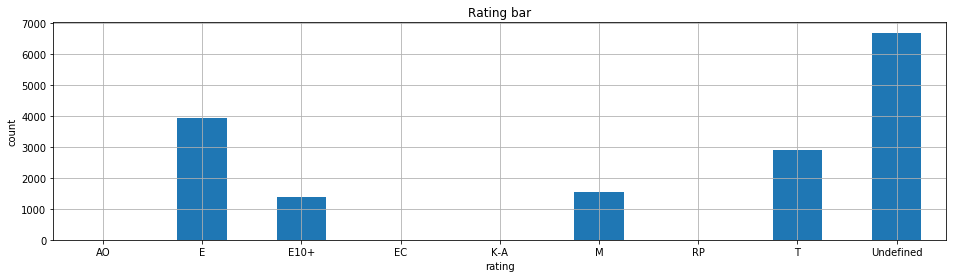

In [45]:
ax = games['rating'].value_counts().sort_index().plot(kind='bar', figsize=(16, 4), grid=True, title='Rating bar', rot=0)
ax.set(xlabel="rating", ylabel="count")
plt.show()

Пропуски рейтинга заполнили значением *Undefined*

### 2.4 Добавление новых столбцов

In [46]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [47]:
games.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Undefined,28.31


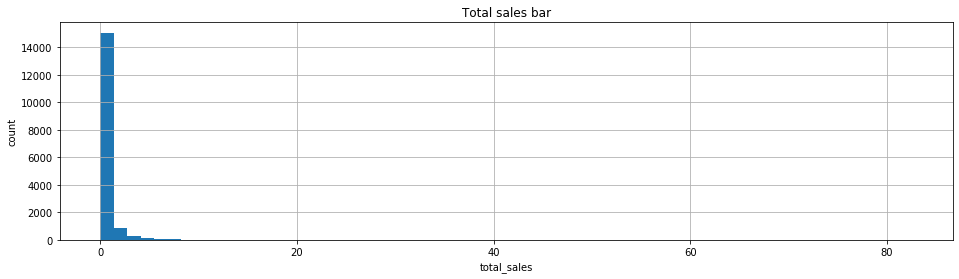

In [48]:
ax = games['total_sales'].plot(kind='hist', bins=60, figsize=(16, 4), grid=True, title='Total sales bar', rot=0)
ax.set(xlabel="total_sales", ylabel="count")
plt.show()

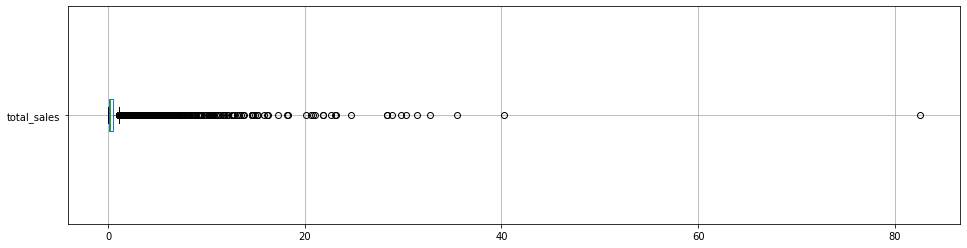

In [49]:
games.boxplot(column=['total_sales'], vert=False, figsize=(16, 4));

Посчитали сумму продаж во всех регионах.

#### Вывод:

Мы удалили строки без заполненного года выпуска. Привели столбец с годом к целочисленному типу.

Заменили значение *tbd* в столбце оценка пользователей на NaN и привели столбец к типу *float64*.

Удалили 2 строки с пустыми названиеями и жанрами игры

Оставшиеся столбюцы с пропусками не трогаем.

Посчитали сумму продаж во всех регионах.

## 3. Исследовательский анализ
<a id="step_3"></a>

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [50]:
games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

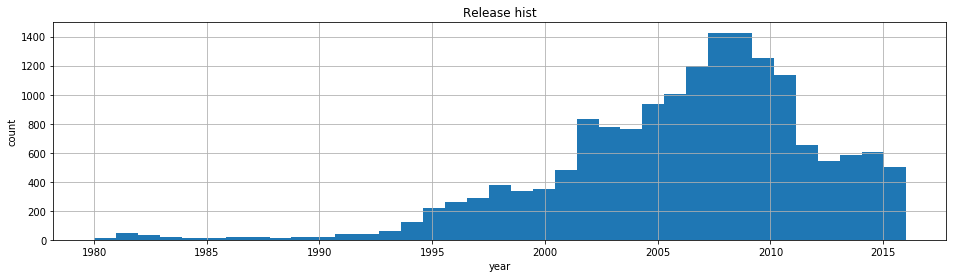

In [51]:
ax = games['year_of_release'].plot(kind='hist', bins=37, figsize=(16, 4), grid=True, title='Release hist')
ax.set(xlabel="year", ylabel="count")
plt.show()

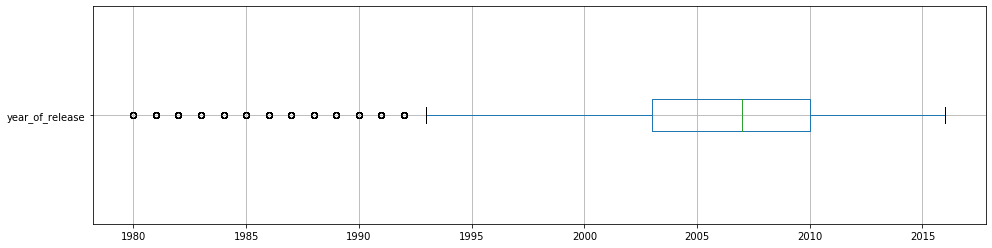

In [52]:
games.boxplot(column=['year_of_release'], vert=False, figsize=(16, 4));

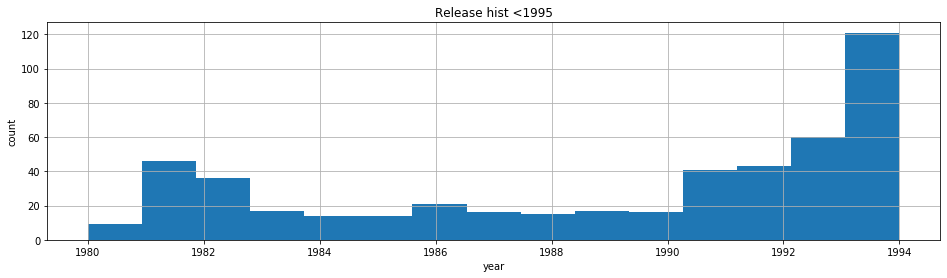

In [53]:
ax = (
    games
    .query('year_of_release < 1995')['year_of_release']
    .plot(kind='hist', bins=15, figsize=(16, 4), grid=True, title='Release hist <1995')
)
ax.set(xlabel="year", ylabel="count")
plt.show()

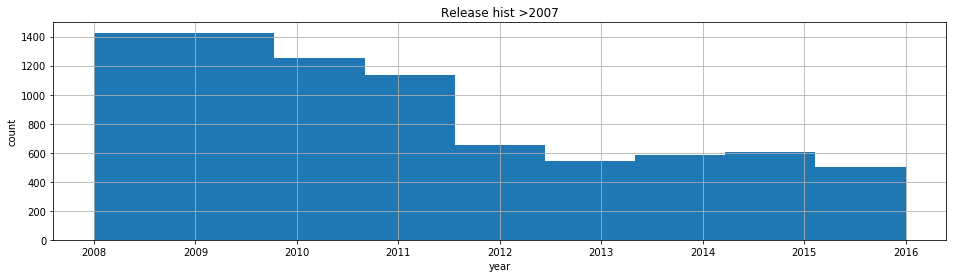

In [54]:
ax = (
    games
    .query('year_of_release > 2007')['year_of_release']
    .plot(kind='hist', bins=9, figsize=(16, 4), grid=True, title='Release hist >2007')
)
ax.set(xlabel="year", ylabel="count")
plt.show()

Было выпущено 16444 игры в период с 1980 по 2016 год.
- 2007 год самый популярный, было выпущено больше 1400 игр за год
- до 1993 года выпускалось менее 50 игр в год
- с 2003 по 2010 годы выпускалось наибольше кол-во игр ежегодно
- с 2009 по 2013 год был спад, с каждым годом кол-во выпускаемых игр уменьшалось, с 1400 игр в год до ~550
- с 2012 по 2016 год примерно одинаковое кол-во игр выпускается ежегодно ~600

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [55]:
platform_total_sales = (
    games
    .pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
platform_total_sales_top6 = platform_total_sales.head(6)
platform_total_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Можно выделить первые 6 позиций: PS2, X360, PS3, Wii, DS, PS. Их продажи значительно превосходят продажи игр других платформ.

In [56]:
platform_year_sales = (
    games
    .query('platform in @platform_total_sales_top6.platform')
    .pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum')
)

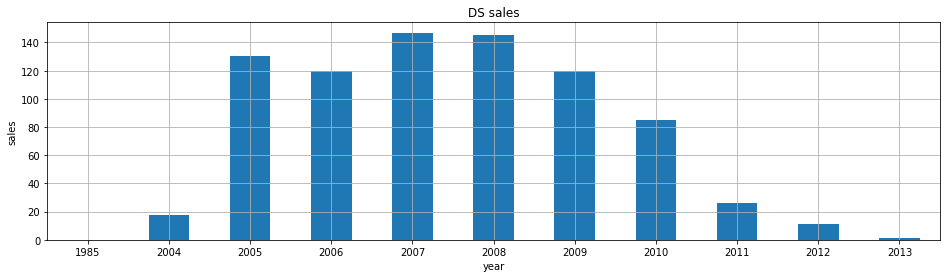

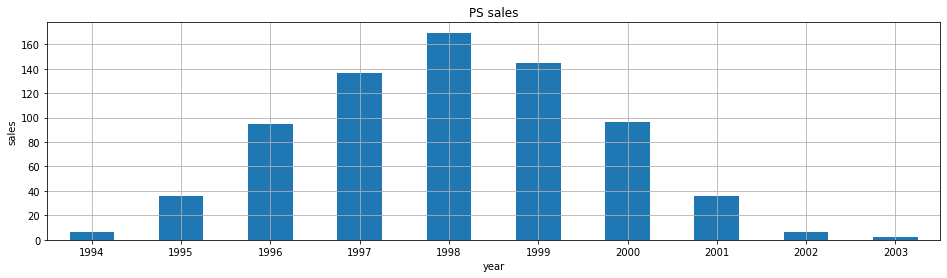

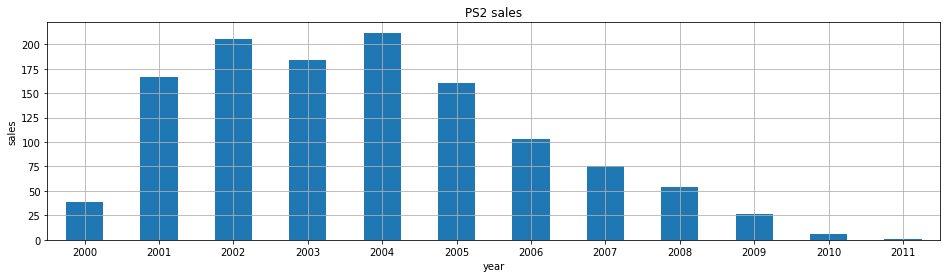

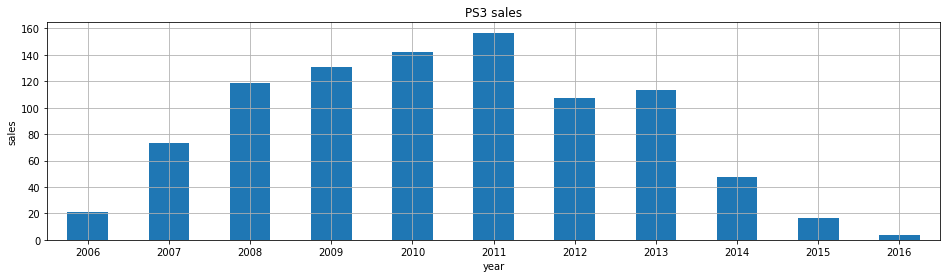

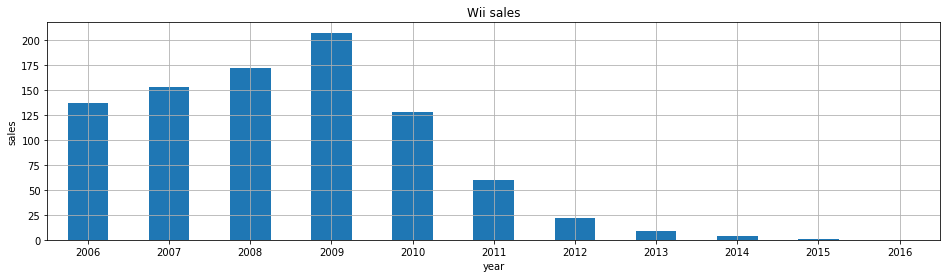

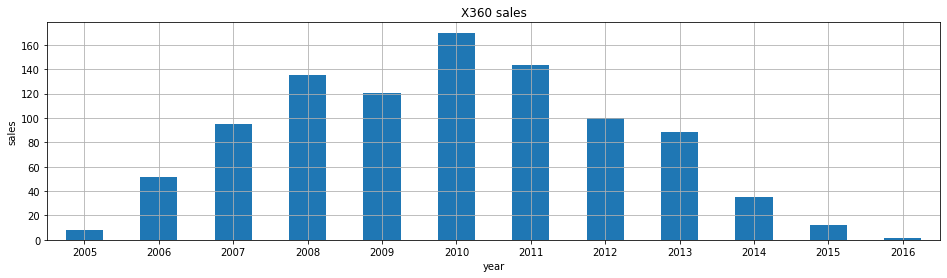

In [57]:
for column in platform_year_sales.columns:
    platform_year_sales\
    .loc[platform_year_sales[column].notnull(), column]\
    .plot(kind='bar', figsize=(16, 4), grid=True, title=f'{column} sales', rot=0)
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()

In [58]:
games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
#.rename(columns={'year_of_release':'start'})

,min,max
,year_of_release,year_of_release
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007


В среднем платформа живет 10 лет, пик продаж по каждой платформе приходится на средние годы жизни платформы (~5ый год).

In [59]:
platform = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform.columns = ['start', 'end']
platform['years'] = platform['end'] - platform['start']
platform['is_active'] = platform['end'] == 2016
platform.head()

,start,end,years,is_active
platform,,,,
2600,1980,1989,9,False
3DO,1994,1995,1,False
3DS,2011,2016,5,True
DC,1998,2008,10,False
DS,1985,2013,28,False


In [60]:
(platform.query('is_active == False')['years'].mean(), platform.query('is_active == False')['years'].median())

(7.0, 6.5)

Если разделить все платформы на те что уже без продаж игр в 2016 (не активные), и те что еще с продажами в 2016 (активные), то по старым платформам средний срок жизни ~7 лет, что отличается от топовых платформ по продажам игр, которые мы рассмотрели ранее. Что логично, т.к. платформы с меньшим кол-во продаж игр живут меньше и это уменьшает средний срок жизни.

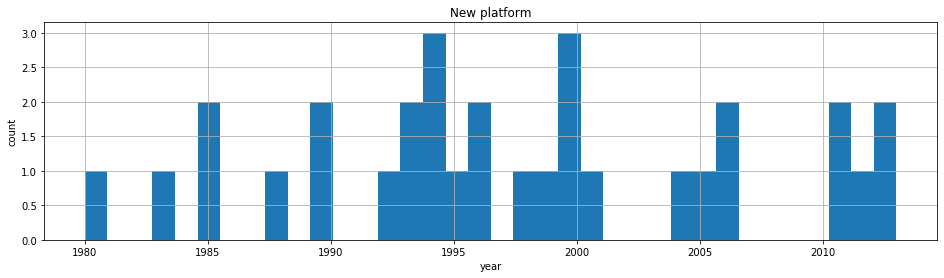

In [61]:
ax = (
    platform['start']
    .plot(kind='hist', bins=36, figsize=(16, 4), grid=True, title='New platform')
)
ax.set(xlabel="year", ylabel="count")
plt.show()

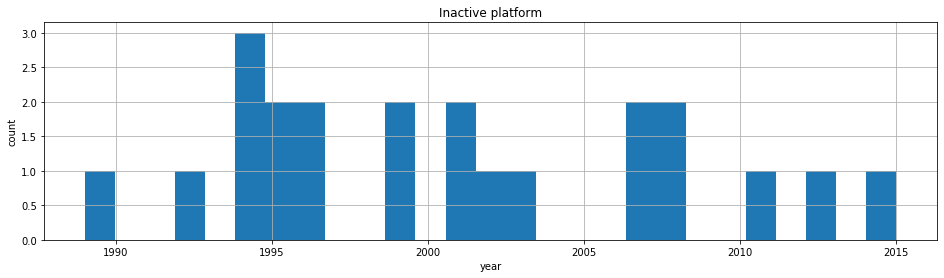

In [62]:
ax = (
    platform
    .query('is_active == False')['end']
    .plot(kind='hist', bins=27, figsize=(16, 4), grid=True, title='Inactive platform')
)
ax.set(xlabel="year", ylabel="count")
plt.show()

In [63]:
platform.query('is_active == True').sort_values(by='start')

,start,end,years,is_active
platform,,,,
PC,1985,2016,31,True
X360,2005,2016,11,True
PS3,2006,2016,10,True
Wii,2006,2016,10,True
3DS,2011,2016,5,True
PSV,2011,2016,5,True
WiiU,2012,2016,4,True
PS4,2013,2016,3,True
XOne,2013,2016,3,True


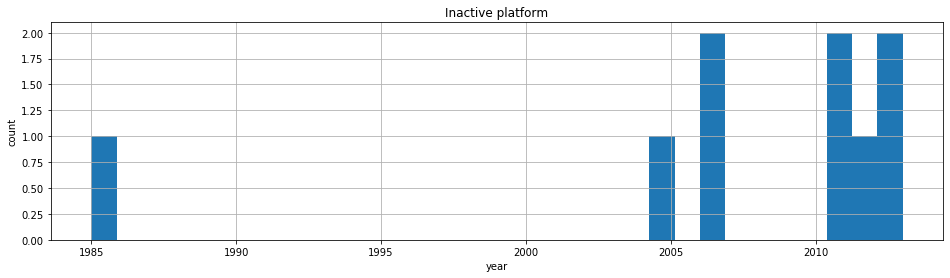

In [64]:
ax = (
    platform
    .query('is_active == True')['start']
    .plot(kind='hist', bins=32, figsize=(16, 4), grid=True, title='Inactive platform')
)
ax.set(xlabel="year", ylabel="count")
plt.show()

#### Вывод

Можно выделить первые 6 платформ: PS2, X360, PS3, Wii, DS, PS. Их продажи значительно превосходят продажи игр других платформ. В среднем такая платформа живет 10 лет, пик продаж по каждой платформе приходится на средние годы жизни платформы (~5ый год).

Если разделить все платформы на те что уже без продаж игр в 2016 (не активные), и те что еще с продажами в 2016 (активные), то по старым платформам средний срок жизни ~7 лет, что отличается от топовых платформ по продажам игр, которые мы рассмотрели ранее. Что логично, т.к. платформы с меньшим кол-во продаж игр живут меньше и это уменьшает средний срок жизни.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом возьмем продажи за 5 лет с 2012 по 2016 год.

In [65]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined,31.38


In [66]:
games_actual = games.query('year_of_release >= 2012')

In [67]:
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [68]:
platform_actual_year_sales = (
    games_actual
    .pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum')
)

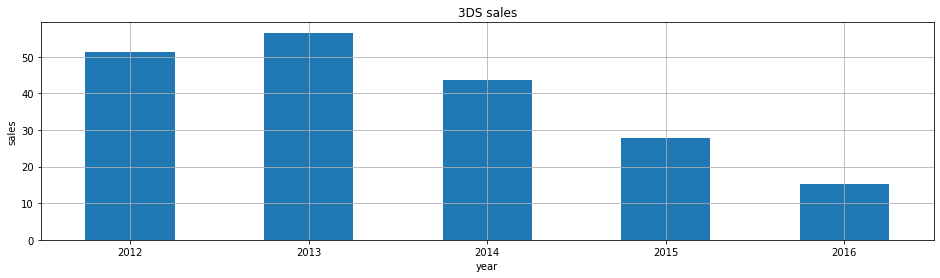

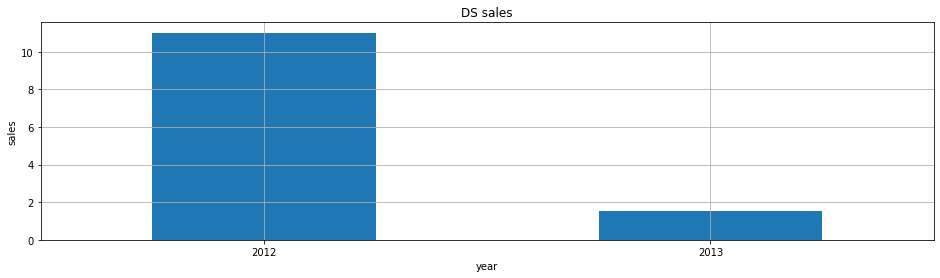

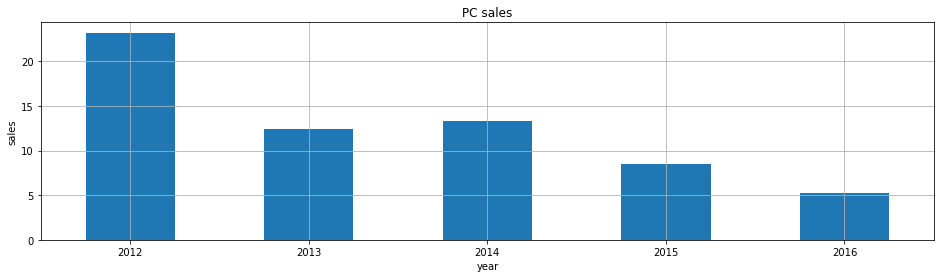

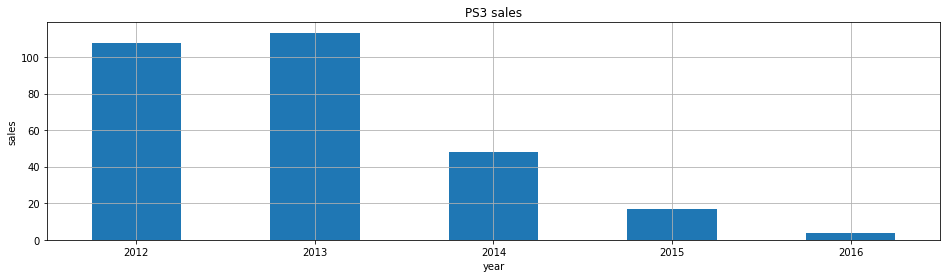

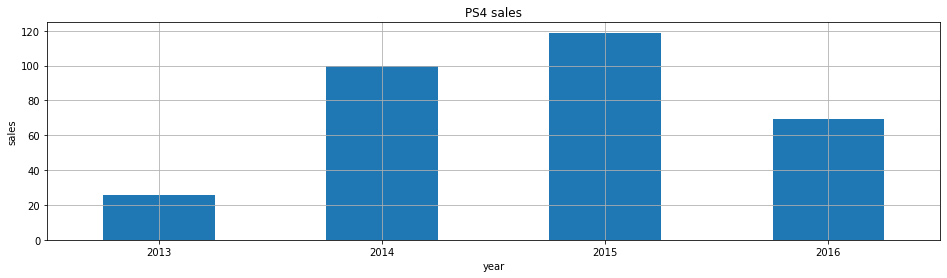

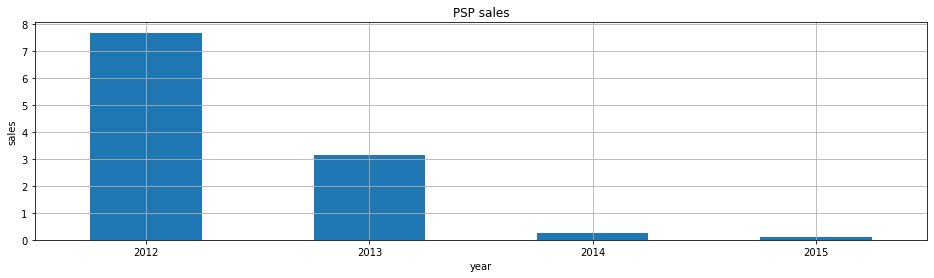

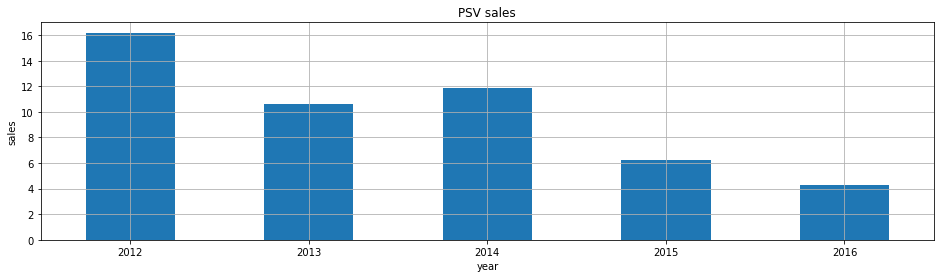

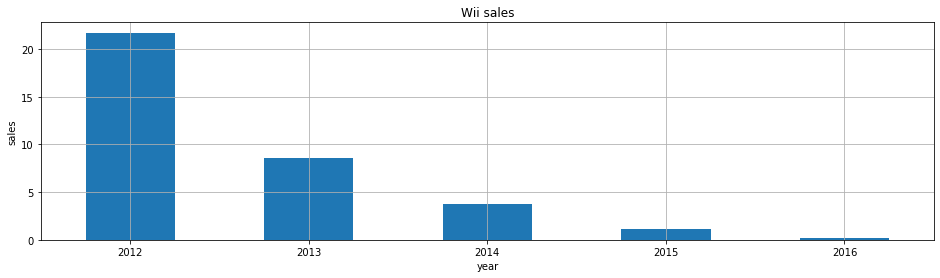

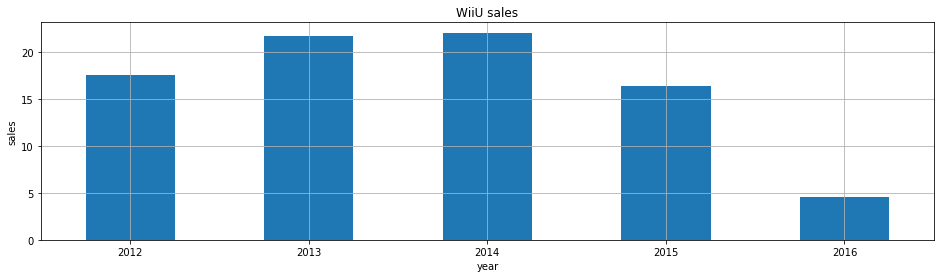

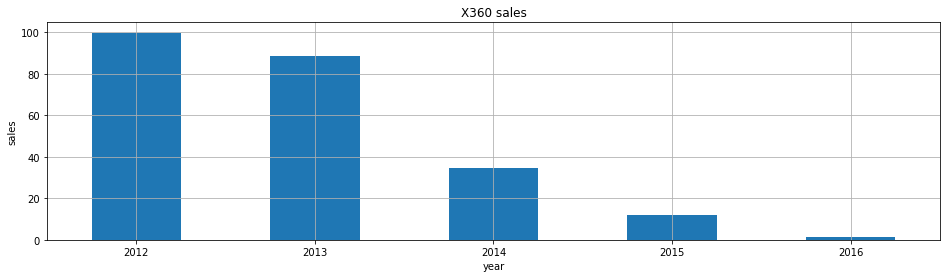

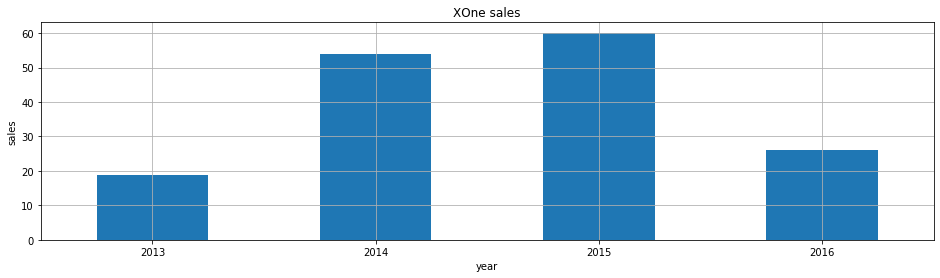

In [69]:
for column in platform_actual_year_sales.columns:
    platform_actual_year_sales\
    .loc[platform_actual_year_sales[column].notnull(), column]\
    .plot(kind='bar', figsize=(16, 4), grid=True, title=f'{column} sales', rot=0)
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()

In [70]:
games_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

- *3DS*: продажи с 2013 года падают уже 3 года
- *DS*: прекратились продажи d 2013
- *PC*: продажи с 2012 медленно падают
- *PS3*: продажи почти закончились
- *PS4*: продажи росли с 2013 по 2015 год, в 2016 кол-во продаж упало, но это кол-во значительно больше чем у остальных платформ
- *PSP*: продажи завершились в 2015 году
- *PSV*: продажи медленно падают
- *Wii*: продажи почти закончились
- *WiiU*: был рост продаж с 2012 по 2015 год, далее 2 года продажи падали стремительно
- *X360*: продажи сильно упали
- *XOne*: был рост продаж с 2013 по 2015, в 2016 году продажи упали

Можно сделать вывод, что по всем платформам в 2016 год был спад продаж. Потенциально прибыльными будем считать: *3DS*, *PC*, *PS4*, *PSV*, *WiiU*, *XOne*.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

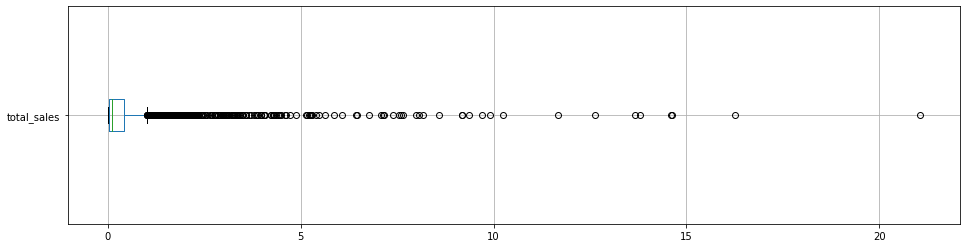

In [71]:
games_actual.boxplot(column='total_sales', vert=False, figsize=(16, 4));

In [72]:
games_actual['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

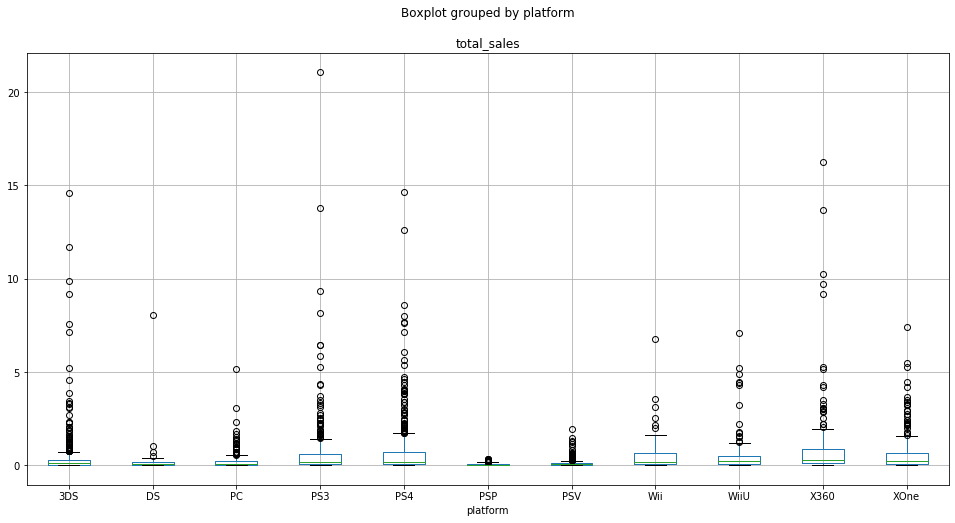

In [73]:
games_actual.boxplot(column='total_sales', by='platform', figsize=(16, 8));

In [74]:
games_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Диаграмма размаха показала нам что в основном все что больше ~1 млн проданных копий по платформе это уже выбросы.

По выбранным перспективным платформам:
- *3DS*: в среднем 110 тыс. продаж, 75% - 312,5 тыс. продаж
- *PC*: в среднем 80 тыс. продаж, 75% - 240 тыс. продаж
- *PS4*: в среднем 200 тыс. продаж, 75% - 730 тыс. продаж, лидер по всем показателям.
- *PSV*: в среднем 50 тыс. продаж, 75% - 120 тыс. продаж
- *WiiU*: в среднем 220 тыс. продаж, 75% - 525 тыс. продаж
- *XOne*: в среднем 220 тыс. продаж, 75% - 685 тыс. продаж, один из лидеров по продажам

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [75]:
ps4 = games_actual.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']]
ps4.head()

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [76]:
ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


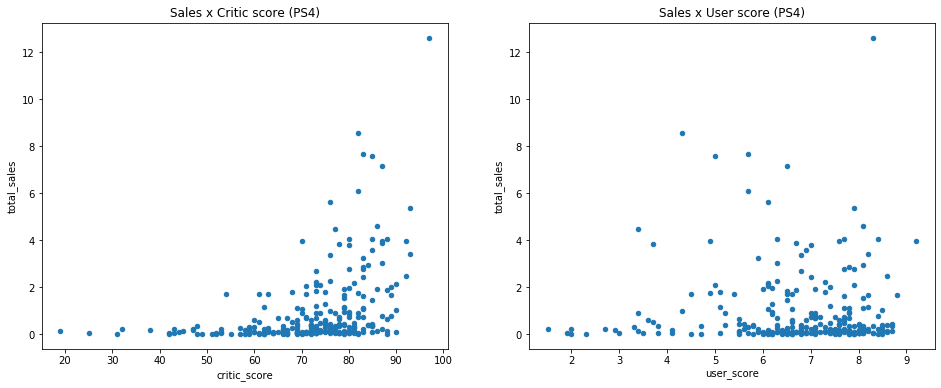

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1 = ps4.plot(kind='scatter', x='critic_score', y='total_sales', title='Sales x Critic score (PS4)', ax=axes[0])
ax2 = ps4.plot(kind='scatter', x='user_score', y='total_sales', title='Sales x User score (PS4)', ax=axes[1])
plt.show()

**PS4**

Корреляция между отзывами и продажами показала положительную зависимость продаж от оценки критиков (0.41) и отсутствие зависимости продаж от оценки пользователей.

### Соотнесите выводы с продажами игр на других платформах.

In [78]:
all_games = games_actual[['total_sales', 'critic_score', 'user_score']]
all_games.head()

,total_sales,critic_score,user_score
16,21.05,97.0,8.2
23,16.27,97.0,8.1
31,14.63,NaN,NaN
33,14.60,NaN,NaN
34,13.79,83.0,5.3


In [79]:
all_games.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.308197,0.004429
critic_score,0.308197,1.000000,0.517727
user_score,0.004429,0.517727,1.000000


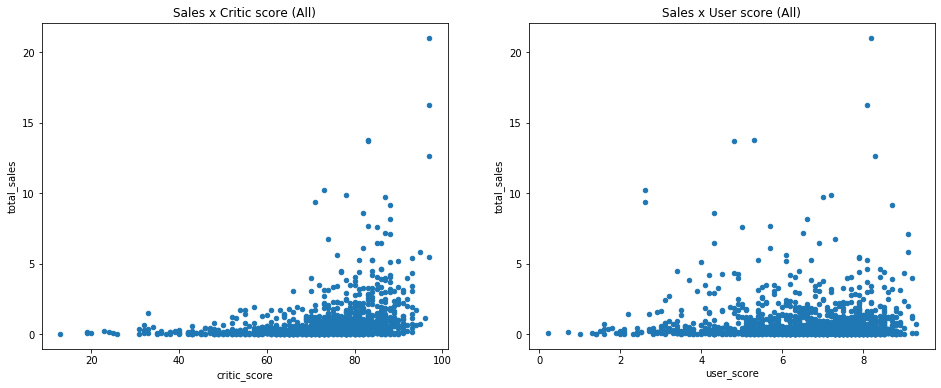

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1 = all_games.plot(kind='scatter', x='critic_score', y='total_sales', title='Sales x Critic score (All)', ax=axes[0])
ax2 = all_games.plot(kind='scatter', x='user_score', y='total_sales', title='Sales x User score (All)', ax=axes[1])
plt.show()

In [81]:
print(len(games_actual['platform'].unique()))
for platform in games_actual['platform'].unique():
    print(platform)

11
PS3
X360
PS4
3DS
DS
XOne
WiiU
Wii
PC
PSV
PSP


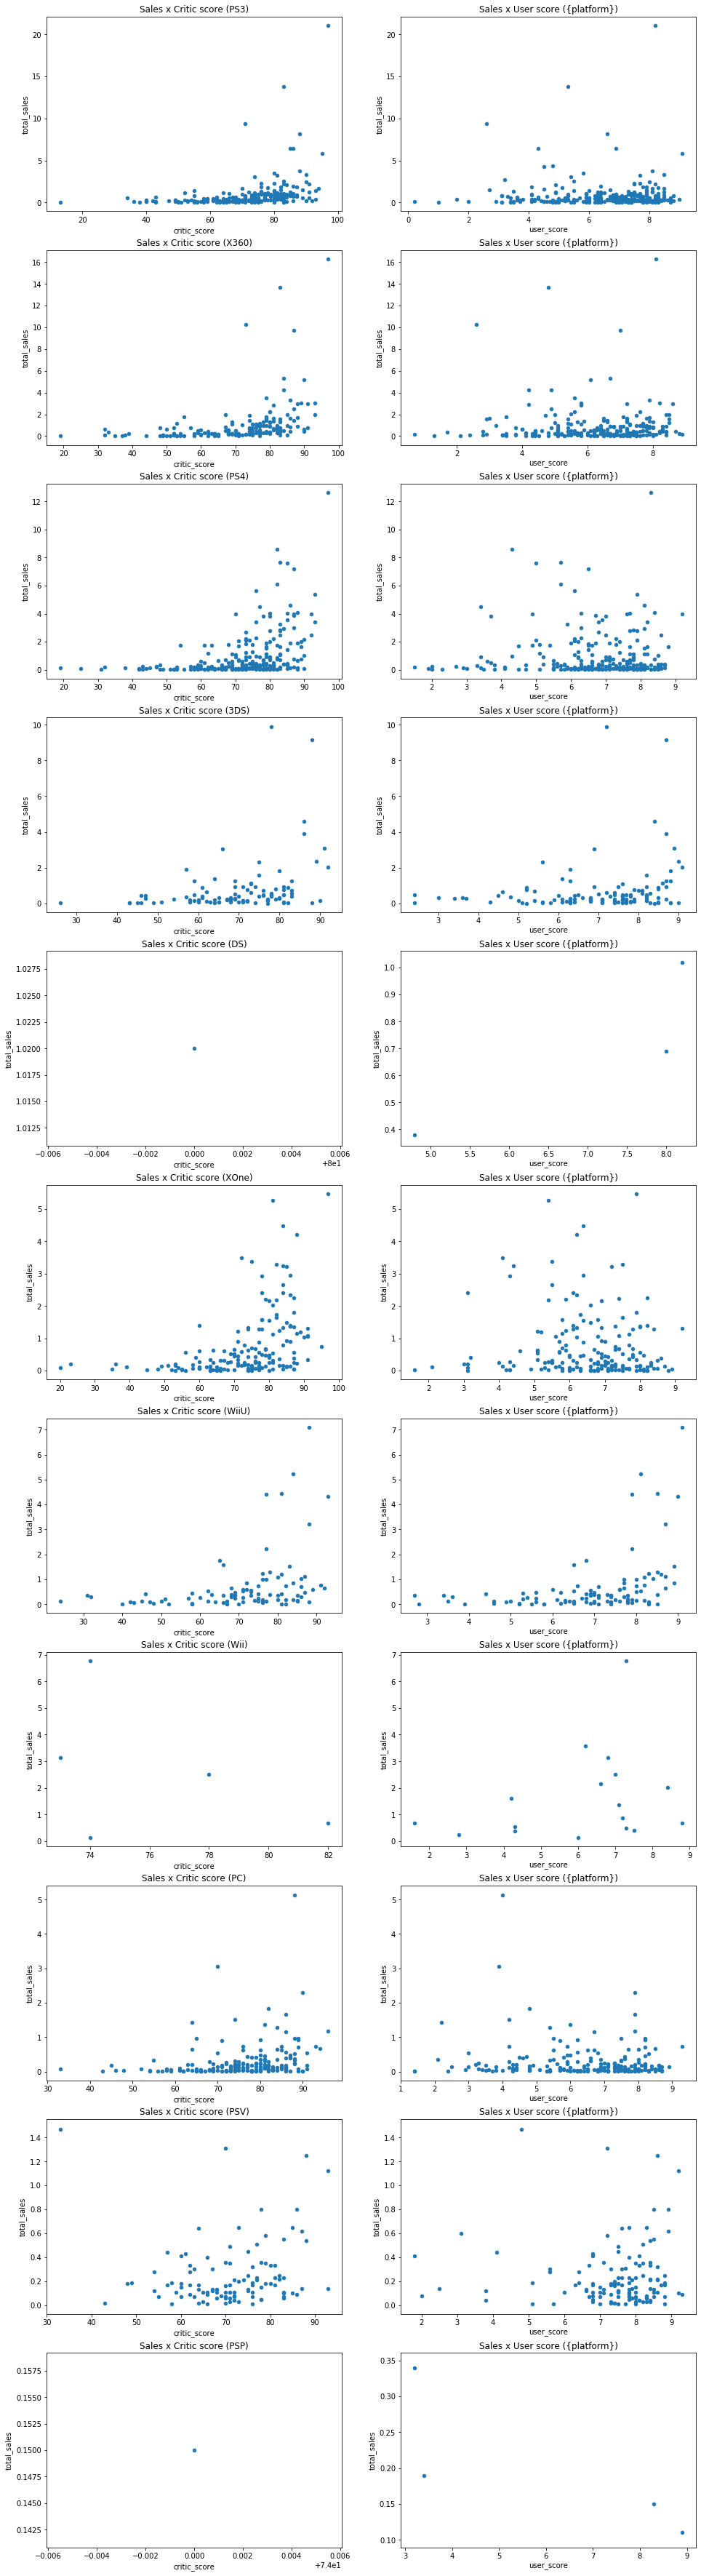

In [82]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(16, 64))
row = 0

for platform in games_actual['platform'].unique():
    ax1 = games_actual.query('platform == @platform').plot(kind='scatter', x='critic_score', y='total_sales', title=f'Sales x Critic score ({platform})', ax=axes[row, 0])
    ax2 = games_actual.query('platform == @platform').plot(kind='scatter', x='user_score', y='total_sales', title='Sales x User score ({platform})', ax=axes[row, 1])
    row += 1
plt.show()

По общим данным мы видим примерно теже результаты, продажи несколько зависят от оценки критиков (0.31) и не зависят от оценки пользователей.

По отдельно результаты немного отличаются:
- Платформы DS, Wii, PSP не имеют достаточного кол-ва данных для анализа
- У лидеров всё схоже, продажи зависят от оценки критиков и не зависят от оценки пользователей

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [83]:
genre = (
    games_actual
    .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'median'])
    #.sort_values(by='total_sales', ascending=False)
    #.reset_index()
)

genre.columns = ['total_sales', 'games', 'median_sales']
genre

,total_sales,games,median_sales
genre,,,
Action,441.12,1031,0.120
Adventure,29.43,302,0.030
Fighting,44.49,109,0.130
Misc,85.04,192,0.120
Platform,61.00,85,0.210
Puzzle,4.89,28,0.045
Racing,53.50,115,0.140
Role-Playing,192.80,370,0.140
Shooter,304.73,235,0.440


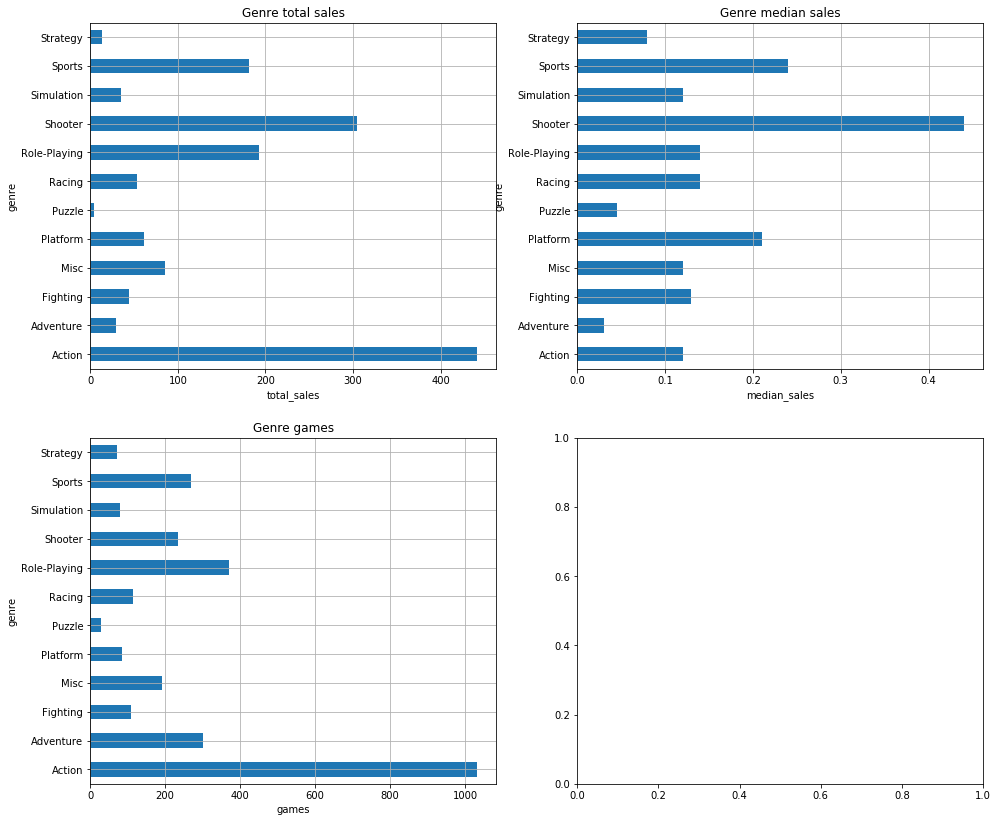

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
ax1 = genre['total_sales'].plot(kind='barh', grid=True, title='Genre total sales', ax=axes[0,0])
ax2 = genre['median_sales'].plot(kind='barh', grid=True, title='Genre median sales', ax=axes[0,1])
ax3 = genre['games'].plot(kind='barh', grid=True, title='Genre games', ax=axes[1,0])
ax1.set(xlabel="total_sales", ylabel="genre")
ax2.set(xlabel="median_sales", ylabel="genre")
ax3.set(xlabel="games", ylabel="genre")
plt.show()

Экшены продаются значительно больше остальных жанров. Чуть меньше продаж у шутеров, и так же можно выделить спортивные и *ролевые* игры по общему кол-ву продаж.

Но медианные показатели немного отличаются, шутеры опережают всех по медианному показателю продаж (400+ тыс. продаж). Далее идут спортивные и платформенные. А вот лидер по общему кол-ву продаж - экшены, отавются где-то в серединке всех остальных жанров имея чуть больше 100 тыс. продаж.

Так же стоит отметить что игр жанра эксшен в несколько раз больше чем в остальных жанрах, что не могло не отразиться и на общем колве продаж и на мединном показателе.

## 4. Портрет пользователя каждого региона
<a id="step_4"></a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [85]:
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [86]:
games_actual_region = games_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')

for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    part = sales.replace('sales', 'part')
    games_actual_region[part] = round(games_actual_region[sales] / games_actual_region['total_sales'].sum(), 2) * 100

games_actual_region['part'] = round(games_actual_region['total_sales'] / games_actual_region['total_sales'].sum(), 2) * 100

games_actual_region

,eu_sales,jp_sales,na_sales,other_sales,total_sales,na_part,eu_part,jp_part,other_part,part
platform,,,,,,,,,,
3DS,42.64,87.79,55.31,8.87,194.61,4.0,3.0,6.0,1.0,13.0
DS,3.53,3.72,4.59,0.71,12.55,0.0,0.0,0.0,0.0,1.0
PC,37.76,0.00,19.12,5.77,62.65,1.0,3.0,0.0,0.0,4.0
PS3,106.86,35.29,103.38,43.26,288.79,7.0,7.0,2.0,3.0,20.0
PS4,141.09,15.96,108.74,48.35,314.14,8.0,10.0,1.0,3.0,22.0
PSP,0.42,10.47,0.13,0.17,11.19,0.0,0.0,1.0,0.0,1.0
PSV,11.36,21.04,10.98,5.80,49.18,1.0,1.0,1.0,0.0,3.0
Wii,11.92,3.39,17.45,2.61,35.37,1.0,1.0,0.0,0.0,2.0
WiiU,25.13,13.01,38.10,5.95,82.19,3.0,2.0,1.0,0.0,6.0


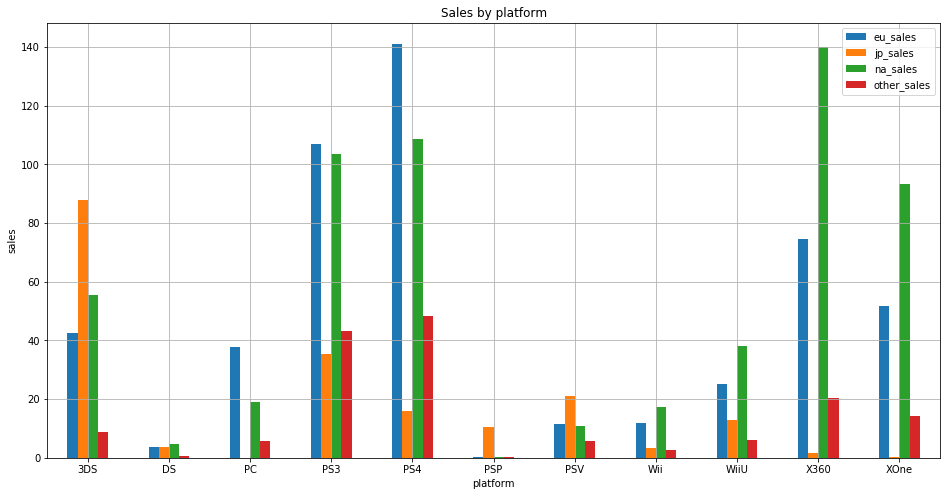

In [87]:
ax = games_actual_region[['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]\
.plot(kind='bar', figsize=(16, 8), title='Sales by platform', rot=0, grid=True)
ax.set(xlabel="platform", ylabel="sales")
plt.show()

В каждом регионе свои лидеры по продажам игр:
- В EU лидирует PS4 c 27.8% от всех платформ, это 10% продаж во всем мире.
- В JP лидирует 3DS с 45.6%, и это 6% продаж от всего мира.
- В NA лидирует X360 с 23.7%, это 10% от продаж во всем мире
- В оставшихся регионах лидирует PS4 с 31% продаж игр, c 3% от продаж во всем мире.

Продажи во всех регионах отличаются, региональные лидеры так же являются лидерами по продажам во всем мире по своим платформам.

In [88]:
for sales in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Топ-5 продаж игр по платформам {sales}')
    part = sales.replace('sales', 'part')
    print(games_actual_region[[sales, part]].sort_values(by=sales, ascending=False).head(5))
    print()

Топ-5 продаж игр по платформам na_sales
          na_sales  na_part
platform                   
X360        140.05     10.0
PS4         108.74      8.0
PS3         103.38      7.0
XOne         93.12      6.0
3DS          55.31      4.0

Топ-5 продаж игр по платформам eu_sales
          eu_sales  eu_part
platform                   
PS4         141.09     10.0
PS3         106.86      7.0
X360         74.52      5.0
XOne         51.59      4.0
3DS          42.64      3.0

Топ-5 продаж игр по платформам jp_sales
          jp_sales  jp_part
platform                   
3DS          87.79      6.0
PS3          35.29      2.0
PSV          21.04      1.0
PS4          15.96      1.0
WiiU         13.01      1.0



Японский рынок отличается от американского и европейского. 6% продаж приходится на игры платформы 3DS, которая на европейском и американском рынке занимает лишь 5 место с 3-4%. И на японском рынке в топ-5 отсутствуют продажи игр для платформ X360 и XOne, которые входят в топ-5 на американском и европейском рынке.

На японском рынке лидируют продажи игр для консолей местного производства. Так же как и на американском рынке в лидерах консоль американского производства.

In [89]:
games_actual_genre = games_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')

for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    part = sales.replace('sales', 'part')
    games_actual_genre[part] = round(games_actual_genre[sales] / games_actual_genre['total_sales'].sum(), 2) * 100

games_actual_genre['part'] = round(games_actual_genre['total_sales'] / games_actual_genre['total_sales'].sum(), 2) * 100

games_actual_genre

,eu_sales,jp_sales,na_sales,other_sales,total_sales,na_part,eu_part,jp_part,other_part,part
genre,,,,,,,,,,
Action,159.34,52.80,177.84,51.14,441.12,12.0,11.0,4.0,4.0,30.0
Adventure,9.46,8.24,8.92,2.81,29.43,1.0,1.0,1.0,0.0,2.0
Fighting,10.79,9.44,19.79,4.47,44.49,1.0,1.0,1.0,0.0,3.0
Misc,26.32,12.86,38.19,7.67,85.04,3.0,2.0,1.0,1.0,6.0
Platform,21.41,8.63,25.38,5.58,61.00,2.0,1.0,1.0,0.0,4.0
Puzzle,1.40,2.14,1.13,0.22,4.89,0.0,0.0,0.0,0.0,0.0
Racing,27.29,2.50,17.22,6.49,53.50,1.0,2.0,0.0,0.0,4.0
Role-Playing,48.53,65.44,64.00,14.83,192.80,4.0,3.0,5.0,1.0,13.0
Shooter,113.47,9.23,144.77,37.26,304.73,10.0,8.0,1.0,3.0,21.0


In [90]:
for sales in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Топ-5 продаж игр по жанрам {sales}')
    part = sales.replace('sales', 'part')
    print(games_actual_genre[[sales, part, 'part']].sort_values(by=sales, ascending=False).head(5))
    print()

Топ-5 продаж игр по жанрам na_sales
              na_sales  na_part  part
genre                                
Action          177.84     12.0  30.0
Shooter         144.77     10.0  21.0
Sports           81.53      6.0  13.0
Role-Playing     64.00      4.0  13.0
Misc             38.19      3.0   6.0

Топ-5 продаж игр по жанрам eu_sales
              eu_sales  eu_part  part
genre                                
Action          159.34     11.0  30.0
Shooter         113.47      8.0  21.0
Sports           69.09      5.0  13.0
Role-Playing     48.53      3.0  13.0
Racing           27.29      2.0   4.0

Топ-5 продаж игр по жанрам jp_sales
              jp_sales  jp_part  part
genre                                
Role-Playing     65.44      5.0  13.0
Action           52.80      4.0  30.0
Misc             12.86      1.0   6.0
Simulation       10.41      1.0   2.0
Fighting          9.44      1.0   3.0



Очевидно что самым популярным жанром является Экшен, который занимает 30% продаж игр во всем мире и лидирует на американском рынке с 12%, на европейском рынке с 11% и на японском с 4% продаж.

Европейский и американский рынок практически идентичны по жанрам (Action, Shooter, Sports, Role-Playing, Misc/Racing), японский же рынок по жанрам тоже отличается, здесь предпочитают игры жанра: Role-Playing, Action, Misc, Simulation, Fighting

In [91]:
games_actual_rating = games_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')

for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    part = sales.replace('sales', 'part')
    games_actual_rating[part] = round(games_actual_rating[sales] / games_actual_rating['total_sales'].sum(), 2) * 100

games_actual_rating['part'] = round(games_actual_rating['total_sales'] / games_actual_rating['total_sales'].sum(), 2) * 100

games_actual_rating

,eu_sales,jp_sales,na_sales,other_sales,total_sales,na_part,eu_part,jp_part,other_part,part
rating,,,,,,,,,,
E,113.03,28.33,114.37,31.44,287.17,8.0,8.0,2.0,2.0,20.0
E10+,55.37,8.19,75.70,16.23,155.49,5.0,4.0,1.0,1.0,11.0
M,193.96,21.20,231.57,63.38,510.11,16.0,13.0,1.0,4.0,35.0
T,52.96,26.02,66.02,17.94,162.94,5.0,4.0,2.0,1.0,11.0
Undefined,91.50,108.84,103.31,27.17,330.82,7.0,6.0,8.0,2.0,23.0


In [92]:
for sales in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Топ-5 продаж игр по рейтингу {sales}')
    part = sales.replace('sales', 'part')
    print(games_actual_rating[[sales, part, 'part']].sort_values(by=sales, ascending=False).head(5))
    print()

Топ-5 продаж игр по рейтингу na_sales
           na_sales  na_part  part
rating                            
M            231.57     16.0  35.0
E            114.37      8.0  20.0
Undefined    103.31      7.0  23.0
E10+          75.70      5.0  11.0
T             66.02      5.0  11.0

Топ-5 продаж игр по рейтингу eu_sales
           eu_sales  eu_part  part
rating                            
M            193.96     13.0  35.0
E            113.03      8.0  20.0
Undefined     91.50      6.0  23.0
E10+          55.37      4.0  11.0
T             52.96      4.0  11.0

Топ-5 продаж игр по рейтингу jp_sales
           jp_sales  jp_part  part
rating                            
Undefined    108.84      8.0  23.0
E             28.33      2.0  20.0
T             26.02      2.0  11.0
M             21.20      1.0  35.0
E10+           8.19      1.0  11.0



Мы видим снову теже результаты, как рынок на европейском и американском рынке выглядит примерно похожим, в нем существует зависимость продаж от рейтинга, в лидерах игры с рейтингом M и E. На японском же рынке такой зависимости не заметно.

Стоит отметить что рейтинг от организации ESRB имеет значение в на европейском и американском рынке, на японском же рынке лидируют продажи без такого рейтинга.

## 5. Проверка гипотез
<a id="step_5"></a>

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Критический уровень статистической значимости мы задали 0,05. Мы хотим получить 95% вероятности правильной проверки гипотезы.

- **Нулевая гипотеза**: средние пользовательские рейтинги платформ XOne и PC __не различаются__
- **Альтернативная гипотеза**: средние пользовательские рейтинги платформ XOne и PC __различаются__

Посмотрим сначала на дисперсии дух выборок, равные ли они.

In [93]:
xone_user_score = games_actual.query('platform == "XOne" and user_score.notnull()')['user_score']
pc_user_score = games_actual.query('platform == "PC" and user_score.notnull()')['user_score']

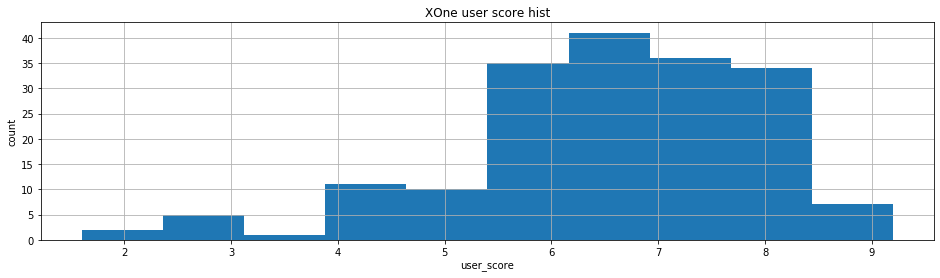

In [94]:
ax = xone_user_score.plot(kind='hist', bins=10, figsize=(16, 4), grid=True, title='XOne user score hist')
ax.set(xlabel="user_score", ylabel="count")
plt.show()

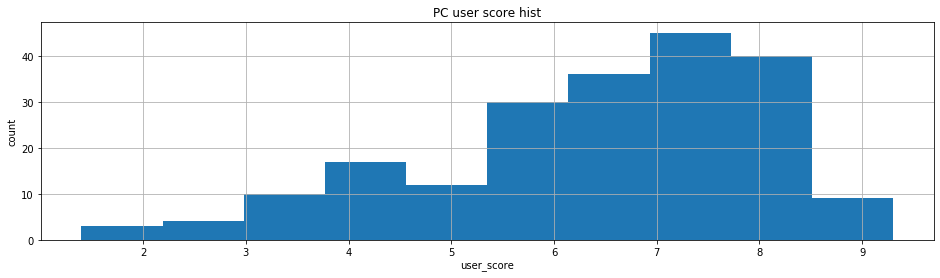

In [95]:
ax = pc_user_score.plot(kind='hist', bins=10, figsize=(16, 4), grid=True, title='PC user score hist')
ax.set(xlabel="user_score", ylabel="count")
plt.show()

In [96]:
xone_user_score_var = np.var(xone_user_score, ddof=1)
pc_user_score_var = np.var(pc_user_score, ddof=1)
(xone_user_score_var, pc_user_score_var)

(1.9069968429360695, 2.770443997158418)

Дисперсии различаются, значит мы будем использовать equal_var = False в Т-тесте.

In [97]:
alpha = .05

In [98]:
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

In [99]:
print('p-значение:', results.pvalue)

p-значение: 0.5489537965134912


In [100]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась, а значит средние пользовательские рейтинги платформ XOne и PC не различаются.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Критический уровень статистической значимости мы зададим 0,05. Мы хотим получить 95% вероятности правильной проверки гипотезы.

- **Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports __не различаются__
- **Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports __различаются__

Посмотрим сначала на дисперсии дух выборок, равные ли они.

In [101]:
action_user_score = games_actual.query('genre == "Action" and user_score.notnull()')['user_score']
sports_user_score = games_actual.query('genre == "Sports" and user_score.notnull()')['user_score']

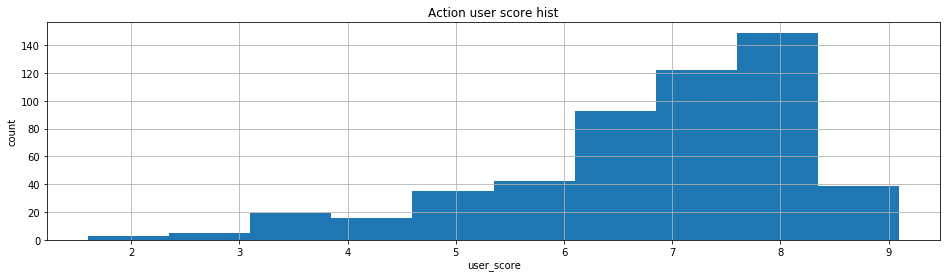

In [102]:
ax = action_user_score.plot(kind='hist', bins=10, figsize=(16, 4), grid=True, title='Action user score hist')
ax.set(xlabel="user_score", ylabel="count")
plt.show()

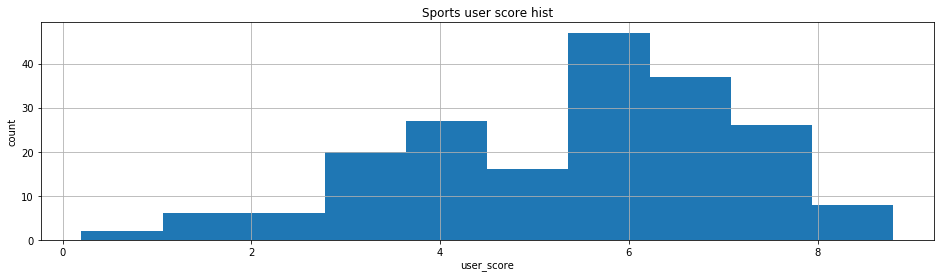

In [103]:
ax = sports_user_score.plot(kind='hist', bins=10, figsize=(16, 4), grid=True, title='Sports user score hist')
ax.set(xlabel="user_score", ylabel="count")
plt.show()

In [104]:
action_user_score_var = np.var(action_user_score, ddof=1)
sports_user_score_var = np.var(sports_user_score, ddof=1)
(action_user_score_var, sports_user_score_var)

(1.8890840494348111, 3.022890298704732)

Дисперсии различаются, значит мы будем использовать equal_var = False в Т-тесте.

In [105]:
alpha = .05

In [106]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

In [107]:
print('p-значение:', results.pvalue)

p-значение: 4.24307776572644e-20


In [108]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги жанров Action и Sports различаются.

## 6. Общий вывод
<a id="step_6"></a>

Мы получили файл с данными по продажам игр до 2016 года. Файл содержит 16715 строк. Полных дубликатов нет.

У нас есть 2 пропуска в столбце с наименованиями игр, есть пропуски в годах выпуска игр, в жанрах, в оценке критиков, в оценке пользователей и в рейтинге.

Всего 11560 игр, игры представлены разными платформами и соответственно под разные платформы игры были выпущены в разные годы и имели различные оценки.

31 платформа, игры с 1980 по 2016 год выпуска, наибольше кол-во игр было выпущено в 2008-2009гг., 12 различных жанров. Оценки критиков от 0 до 100, оценки пользователей от 0 до 10, но в есть значения "tbd", которые следует заменить на nan. И рейтинг ESRB с категориальными значениями.

Предобработали данные:
- Мы удалили строки без заполненного года выпуска. Привели столбец с годом к целочисленному типу.
- Заменили значение tbd в столбце оценка пользователей на NaN и привели столбец к типу float64.
- Удалили 2 строки с пустыми названиеями и жанрами игры
- Оставшиеся столбюцы с пропусками не трогаем.
- Посчитали сумму продаж во всех регионах.

Мы проверил исследовательский анализ данных:
Было выпущено 16444 игры в период с 1980 по 2016 год.
- 2007 год самый популярный, было выпущено больше 1400 игр за год
- до 1993 года выпускалось менее 50 игр в год
- с 2003 по 2010 годы выпускалось наибольше кол-во игр ежегодно
- с 2009 по 2013 год был спад, с каждым годом кол-во выпускаемых игр уменьшалось, с 1400 игр в год до ~550
- с 2012 по 2016 год примерно одинаковое кол-во игр выпускается ежегодно ~600


Можно выделить 6 платформ: PS2, X360, PS3, Wii, DS, PS. Их продажи значительно превосходят продажи игр других платформ. В среднем такая платформа живет 10 лет, пик продаж по каждой платформе приходится на средние годы жизни платформы (~5ый год).

Если разделить все платформы на те что уже без продаж игр в 2016 (не активные), и те что еще с продажами в 2016 (активные), то по старым платформам средний срок жизни ~7 лет, что отличается от топовых платформ по продажам игр, которые мы рассмотрели ранее. Что логично, т.к. платформы с меньшим кол-во продаж игр живут меньше и это уменьшает средний срок жизни.


Актуальным периодом взяли продажи за 5 лет с 2012 по 2016 год.

Посмотрели на продажи в разрезе платформ:
- *3DS*: продажи с 2013 года падают уже 3 года
- *DS*: прекратились продажи d 2013
- *PC*: продажи с 2012 медленно падают
- *PS3*: продажи почти закончились
- *PS4*: продажи росли с 2013 по 2015 год, в 2016 кол-во продаж упало, но это кол-во значительно больше чем у остальных платформ
- *PSP*: продажи завершились в 2015 году
- *PSV*: продажи медленно падают
- *Wii*: продажи почти закончились
- *WiiU*: был рост продаж с 2012 по 2015 год, далее 2 года продажи падали стремительно
- *X360*: продажи сильно упали
- *XOne*: был рост продаж с 2013 по 2015, в 2016 году продажи упали

Можно сделать вывод, что по всем платформам в 2016 год был спад продаж. Потенциально прибыльными будем считать: *3DS*, *PC*, *PS4*, *PSV*, *WiiU*, *XOne*.

Диаграмма размаха показала нам что в основном все что больше ~1 млн проданных копий по платформе это уже выбросы.

По выбранным перспективным платформам:
- *3DS*: в среднем 110 тыс. продаж, 75% - 312,5 тыс. продаж
- *PC*: в среднем 80 тыс. продаж, 75% - 240 тыс. продаж
- *PS4*: в среднем 200 тыс. продаж, 75% - 730 тыс. продаж, лидер по всем показателям.
- *PSV*: в среднем 50 тыс. продаж, 75% - 120 тыс. продаж
- *WiiU*: в среднем 220 тыс. продаж, 75% - 525 тыс. продаж
- *XOne*: в среднем 220 тыс. продаж, 75% - 685 тыс. продаж, один из лидеров по продажам


Корреляция между отзывами и продажами для платформы PS4 показала положительную зависимость продаж от оценки критиков (0.41) и отсутствие зависимости продаж от оценки пользователей.

Так же продажи несколько зависят от оценки пользователей (0.31) и не зависят от оценки пользователей.


Экшены продаются значительно больше остальных жанров. Чуть меньше продаж у шутеров, и так же можно выделить спортивные и *ролевые* игры по общему кол-ву продаж.

Но медианные показатели немного отличаются, шутеры опережают всех по медианному показателю продаж (400+ тыс. продаж). Далее идут спортивные и платформенные. А вот лидер по общему кол-ву продаж - экшены, отавются где-то в серединке всех остальных жанров имея чуть больше 100 тыс. продаж.

Так же стоит отметить что игр жанра эксшен в несколько раз больше чем в остальных жанрах, что не могло не отразиться и на общем колве продаж и на мединном показателе.


Японский рынок отличается от американского и европейского. 6% продаж приходится на игры платформы 3DS, которая на европейском и американском рынке занимает лишь 5 место с 3-4%. И на японском рынке в топ-5 отсутствуют продажи игр для платформ X360 и XOne, которые входят в топ-5 на американском и европейском рынке.

Очевидно что самым популярным жанром является Экшен, который занимает 30% продаж игр во всем мире и лидирует на американском рынке с 12%, на европейском рынке с 11% и на японском с 4% продаж.

Европейский и американский рынок практически идентичны по жанрам (Action, Shooter, Sports, Role-Playing, Misc/Racing), японский же рынок по жанрам тоже отличается, здесь предпочитают игры жанра: Role-Playing, Action, Misc, Simulation, Fighting

Мы видим снову теже результаты, как рынок на европейском и американском рынке выглядит примерно похожим, в нем существует зависимость продаж от рейтинга, в лидерах игры с рейтингом M и E. На японском же рынке такой зависимости не заметно.


Проверили гипотезы:
- средние пользовательские рейтинги платформ XOne и PC не различаются.
- средние пользовательские рейтинги жанров Action и Sports различаются

In [109]:
import seaborn as sns

In [116]:
x = games_actual.query('platform in ("XOne", "DS", "PC", "PSV", "PSP")')['platform']
y = games_actual.query('platform in ("XOne", "DS", "PC", "PSV", "PSP")')['total_sales']

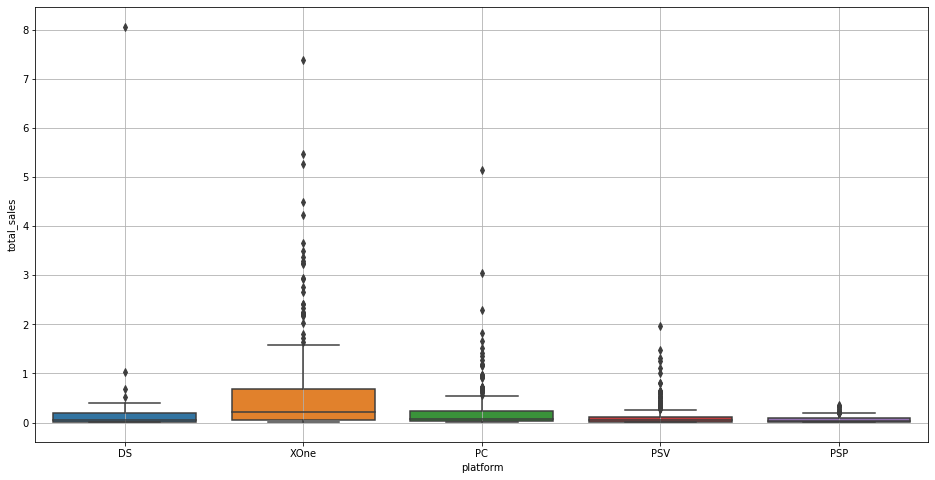

In [118]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x, y);
ax.grid(True)

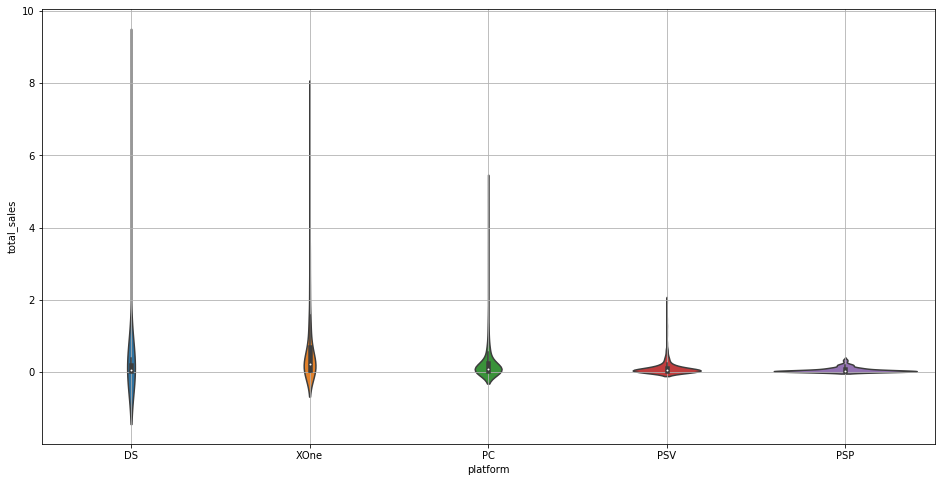

In [115]:
plt.figure(figsize=(16, 8))
ax = sns.violinplot(x,y);
ax.grid(True)